# 排序

## heapq
$heap[k] <= heap[2*k+1]$ and $heap[k] <= heap[2*k+2]$ for all $k$  
refer to: https://docs.python.org/zh-cn/3.8/library/heapq.html  

In [45]:
import heapq

### heapq.heappush(heap, item)
Push the value item onto the heap  

In [47]:
nums = [9,8,7,4,3,2,1]
heap = []
for num in nums:
    heapq.heappush(heap, num)
print(heap)

[1, 4, 2, 9, 7, 8, 3]


### heapq.heapify(x)
Transform list x into a heap, in-place, in linear time

In [48]:
nums = [9,8,7,4,3,2,1]
heapq.heapify(nums)
print(nums)

[1, 3, 2, 4, 8, 9, 7]


### heapq.heappop(heap)
Pop and return the smallest item from the heap

In [49]:
heap = [9,2,3,4,7,8,1]
heapq.heapify(heap) 
print(heapq.heappop(heap))
print(heap)

1
[2, 4, 3, 9, 7, 8]


### heapq.nlargest(n, iterable, key=None)
Return a list with the n largest elements from the dataset defined by iterable  
<=> sorted(iterable, key=key, reverse=True)[:n]  

**heapq.nsmallest(n, iterable, key=None)**  
Return a list with the n smallest elements from the dataset defined by iterable  
<=> sorted(iterable, key=key)[:n]  

In [61]:
heap = [9,2,3,4,7,8,1]
# heapq.heapify(heap) #可不写
print(heapq.nlargest(3, heap))
print(heapq.nsmallest(3, heap))

[9, 8, 7]
[1, 2, 3]


In [57]:
list_dict = [
    {'name': 'IBM', 'shares': 100, 'price': 91.1},
    {'name': 'AAPL', 'shares': 50, 'price': 543.22},
    {'name': 'FB', 'shares': 200, 'price': 21.09},
    {'name': 'HPQ', 'shares': 35, 'price': 31.75},
    {'name': 'YHOO', 'shares': 45, 'price': 16.35},
    {'name': 'ACME', 'shares': 75, 'price': 115.65}]

print(heapq.nsmallest(3, list_dict, key=lambda s: s['price']))
print(heapq.nlargest(3, list_dict, key=lambda s: s['price']))

[{'name': 'YHOO', 'shares': 45, 'price': 16.35}, {'name': 'FB', 'shares': 200, 'price': 21.09}, {'name': 'HPQ', 'shares': 35, 'price': 31.75}]
[{'name': 'AAPL', 'shares': 50, 'price': 543.22}, {'name': 'ACME', 'shares': 75, 'price': 115.65}, {'name': 'IBM', 'shares': 100, 'price': 91.1}]


In [58]:
list_tuples = [(5, 'a'),(7, 'b'),(1, 'f'),(3, 'c')]
print(heapq.nsmallest(3, list_tuples, key=lambda s: s[0]))
print(heapq.nsmallest(3, list_tuples, key=lambda s: s[1]))

[(1, 'f'), (3, 'c'), (5, 'a')]
[(5, 'a'), (7, 'b'), (3, 'c')]


### heapq.heappushpop(heap, item)
Push item on the heap, then pop and return the smallest item from the heap  
more efficiently than heappush() followed by heappop()

In [50]:
heap = [3, 4, 9, 2, 7, 8]
heapq.heapify(heap)
print(heapq.heappushpop(heap, 5)) #先插入5，然后返回并删除最小值2
print(heap)

2
[3, 4, 8, 5, 7, 9]


In [51]:
heap = [5, 4, 9, 3, 7, 8]
heapq.heapify(heap)
print(heapq.heappushpop(heap, 2)) #先插入2，然后返回并删除最小值2
print(heap)

2
[3, 4, 8, 5, 7, 9]


### heapq.heapreplace(heap, item)
Pop and return the smallest item from the heap, and also push the new item  
more efficient than heappop() followed by heappush()

In [52]:
heap = [5, 4, 9, 3, 7, 8]
heapq.heapify(heap)
print(heapq.heapreplace(heap, 2)) #先返回并删除最小值3，然后插入2
print(heap)

3
[2, 4, 8, 5, 7, 9]


### heapq.merge(*iterables, key=None, reverse=False)

In [69]:
nums1 = [32, 3, 5, 34, 54, 23, 132]
nums2 = [23, 2, 12, 656, 324, 23, 54]
nums3 = [11,9,7]
nums_new = heapq.merge(nums1, nums2, nums3)
print(heapq.nsmallest(10, nums_new))

[2, 3, 5, 7, 9, 11, 12, 23, 23, 23]


## 经典排序
refer to:
- https://www.runoob.com/w3cnote/ten-sorting-algorithm.html
- https://www.cnblogs.com/onepixel/p/7674659.html
- https://zhuanlan.zhihu.com/p/38157591
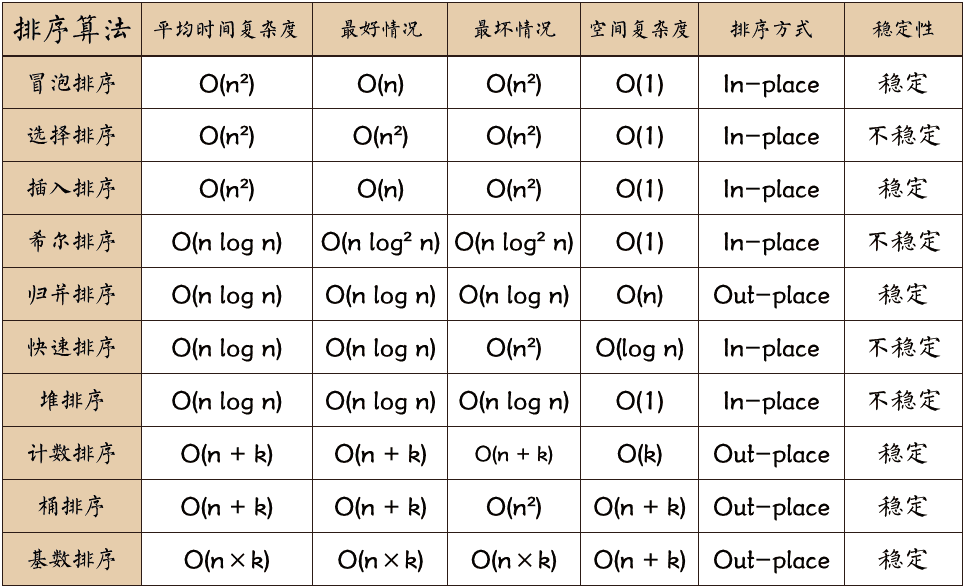
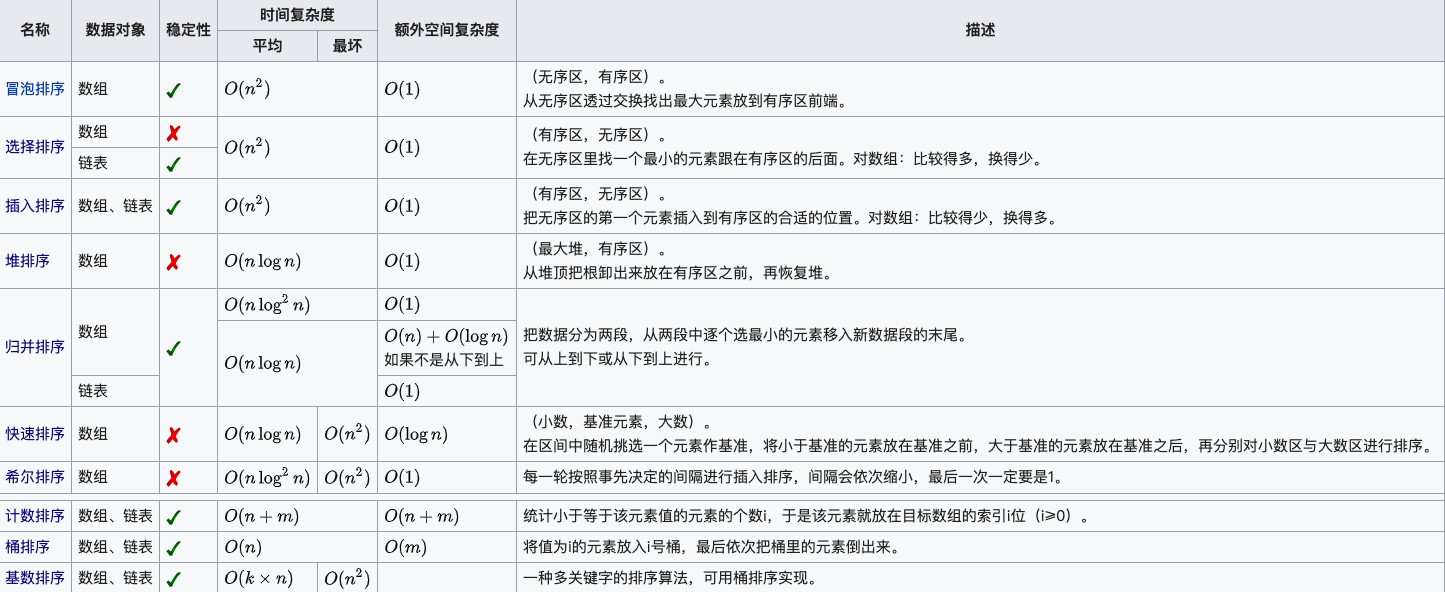

### 堆排序

In [31]:
import heapq
def HeapSort(nums):
    Heap = []
    for num in nums:
        heapq.heappush(Heap, num)
    return [heapq.heappop(Heap) for _ in range(len(Heap))]

In [32]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
HeapSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

In [33]:
def HeapSort2(nums):
    heapq.heapify(nums)
    nums[:] = [heapq.heappop(nums) for _ in range(len(nums))]
    return nums

In [34]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
HeapSort2(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 冒泡排序
依次两两比较，大的放后面

In [9]:
def BubbleSort(nums):
    for ii in range(len(nums)-1, 0, -1):
        for jj in range(ii):
            if nums[jj] > nums[jj+1]:
                nums[jj], nums[jj+1] = nums[jj+1], nums[jj]
    return nums

In [10]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
BubbleSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 选择排序
已当前元素为基准，往后找小于当前元素的最小值，如果找到则交换位置，以此为规则对数组进行遍历

In [11]:
def SelectSort(nums):
    for ii in range(len(nums)-1):
        min_index = ii
        for jj in range(ii+1, len(nums)):
            if nums[jj] < nums[min_index]:
                min_index = jj
        if min_index != ii:
            nums[ii], nums[min_index] = nums[min_index], nums[ii]
    return nums

In [12]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
SelectSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 插入排序/扑克排序
已当前元素为基准，往前找第一个小于基准值的元素，如果找到，将基准值插入到该值之后，如果找不到，将基准值插入到数组最左端，以此为规则对数组进行遍历

In [13]:
def InsertSort(nums):
    for ii in range(1, len(nums)):
        jj = ii-1
        # 通过替换实现插入
        cur = nums[ii]
        while jj >= 0 and nums[jj] > cur:
            nums[jj+1] = nums[jj]
            jj -= 1
        nums[jj+1] = cur
        # # 根据位置直接插入
        # while jj >=0 and nums[jj] > nums[ii]:
        #     jj -= 1
        # nums[:] = nums[0:jj+1] + [nums[ii]] + nums[jj+1:ii] + nums[ii+1:]
    return nums

In [14]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
InsertSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 希尔排序
将原数组以间隔step分解成step个子数组，对每个子数组执行插入排序，将step变小，重复上述操作，直到step为1

In [15]:
def ShellSort(nums):
    steps = [4,2,1] # 需要预先给定分组间隔
    for step in steps:
        sub_nums = [[] for _ in range(step)]
        for ii in range(len(nums)):
            sub_nums[ii % step].append(nums[ii])
        # print("按间隔分组:", sub_nums)
        for sub in sub_nums:
            InsertSort(sub)
        # print("对每组执行插入排序后:", sub_nums)
        for ii in range(len(sub_nums)):
            for jj in range(len(sub_nums[ii])):
                nums[ii + jj * step] = sub_nums[ii][jj]
        # print("将排序后的分组还原回原数组:", nums)
    return nums

In [16]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
ShellSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 归并排序
**自下向上**：底层将每个元素视为一个数组，依次**两两合并**，直到最后只剩一个数组  
**两两合并规则**：选择两个数组中首个元素较小者加入到合并后的新数组中，并从原数组中移除，直到原来的两个数组均为空

In [18]:
def MergeSort(nums):
    record = [[num] for num in nums]
    while len(record) > 1:
        record_new = []
        for ii in range(0, len(record), 2):
            cur_list = []
            if ii+1 < len(record):
                while len(record[ii]) > 0 or len(record[ii+1]) > 0:
                    if len(record[ii]) > 0 and len(record[ii+1]) > 0:
                        if record[ii][0] <=  record[ii+1][0]:
                            cur_list.append(record[ii][0])
                            del(record[ii][0])
                        else:
                            cur_list.append(record[ii+1][0])
                            del(record[ii+1][0])
                    elif len(record[ii]) > 0 and len(record[ii+1]) == 0:
                        cur_list.append(record[ii][0])
                        del(record[ii][0])
                    elif len(record[ii]) == 0 and len(record[ii+1]) > 0:
                        cur_list.append(record[ii+1][0])
                        del(record[ii+1][0])
            else:
                cur_list = record[ii]
            record_new.append(cur_list)
        record = record_new
    return record[0]

In [19]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
MergeSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

**自上而下的递归**

In [20]:
def MergeSort2(nums):
    def merge(left, right):
        result = []
        while left and right:
            if left[0] <= right[0]:
                result.append(left.pop(0))
            else:
                result.append(right.pop(0));
        while left:
            result.append(left.pop(0))
        while right:
            result.append(right.pop(0));
        return result
    if len(nums) < 2:
        return nums
    else:
        return merge(MergeSort2(nums[0:len(nums)//2]), MergeSort2(nums[len(nums)//2:]))

In [21]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
MergeSort2(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 快速排序
随机（或者选第一个元素）为基准，将小于该基准的元素放到左侧，将大于该基准的元素放到右侧，然后分别对左侧和右侧两个数组执行此规则，直到顺序排好

In [23]:
def QuickSort(nums):
    if len(nums) == 0:
        return []
    else:
        cur = nums[0]
        left = []
        right = []
        for ii in range(1,len(nums)):
            if nums[ii] < cur:
                left.append(nums[ii])
            else:
                right.append(nums[ii])
    return QuickSort(left) + [cur] + QuickSort(right)

In [24]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
QuickSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 计数排序
从最小值到最大值依次统计每个元素出现的频数，然后根据频数依次还原数组

In [25]:
def CountingSort(nums):
    num_min = min(nums)
    num_max = max(nums)
    dict1 = {num:0 for num in range(num_min, num_max+1)}
    for num in nums:
        dict1[num] += 1
    output = []
    for num in range(num_min, num_max+1):
        output += [num] * dict1[num]
    return output

In [26]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
CountingSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 桶排序

In [27]:
def BucketSort(nums):
    delta = 5 # 需要预先给定桶的容量
    num_min = min(nums)
    num_max = max(nums)
    # 构建空桶
    dict1 = {}
    for index in range((num_max-num_min)//delta + 1):
        dict1[index] = []
    # 装桶
    for num in nums:
        dict1[(num-num_min)//delta].append(num)
    output = []
    for index in range((num_max-num_min)//delta + 1):
        output += sorted(dict1[index]) # 桶内排序
    return output

In [28]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
BucketSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

### 基数排序
从数字的低位到高位，对每个数字位执行一次桶排序

In [35]:
def RadixSort(nums):
    num_min, num_max = min(nums), max(nums)
    max_len = len(str(num_max - num_min))
    nums_str = []
    for num in nums:
        nums_str.append('0' * (max_len - len(str(num - num_min))) + str(num - num_min))
    for ii in range(max_len-1, -1, -1):
        dict1 = {str(num):[] for num in range(10)}
        for num_str in nums_str:
            dict1[num_str[ii]].append(num_str)
        list_temp = []
        for num in range(10):
            list_temp += dict1[str(num)]
        nums_str = list_temp
    return [int(num_str) + num_min for num_str in nums_str]

In [36]:
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
RadixSort(nums)

[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]

- 随机测试

In [41]:
import random
nums = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48] # 初始数组
target = sorted(nums) # 排序目标

label = True
for _ in range(100):

    random.shuffle(nums) # 随机打乱顺序
    if HeapSort(nums) != target:
        print("HeapSort:", nums)
        label = False

    random.shuffle(nums)
    if HeapSort2(nums) != target:
        print("HeapSort2:", nums)
        label = False
    
    random.shuffle(nums)
    if BubbleSort(nums) != target:
        print("BubbleSort:", nums)
        label = False
    
    random.shuffle(nums)
    if SelectSort(nums) != target:
        print("SelectSort:", nums)
        label = False
    
    random.shuffle(nums)
    if InsertSort(nums) != target:
        print("InsertSort:", nums)
        label = False
    
    random.shuffle(nums)
    if ShellSort(nums) != target:
        print("ShellSort:", nums)
        label = False
    
    random.shuffle(nums)
    if MergeSort(nums) != target:
        print("MergeSort:", nums)
        label = False
    
    random.shuffle(nums)
    if MergeSort2(nums) != target:
        print("MergeSort2:", nums)
        label = False
    
    random.shuffle(nums)
    if QuickSort(nums) != target:
        print("QuickSort:", nums)
        label = False
    
    random.shuffle(nums)
    if CountingSort(nums) != target:
        print("CountingSort:", nums)
        label = False
    
    random.shuffle(nums)
    if BucketSort(nums) != target:
        print("BucketSort:", nums)
        label = False
    
    random.shuffle(nums)
    if RadixSort(nums) != target:
        print("RadixSort:", nums)
        label = False

print("测试成功?", label)

测试成功? True


# 二分查找

In [43]:
import bisect
nums = [0,8,8,8]

# 返回从左侧插入新元素后，该元素的索引
print('往',nums,'左插入7后，7的索引为', bisect.bisect_left(nums,7))
print('往',nums,'左插入8后，8的索引为', bisect.bisect_left(nums,8))
print('往',nums,'左插入9后，9的索引为', bisect.bisect_left(nums,9))

# 返回从后侧插入新元素后，该元素的索引
print('往',nums,'右插入7后，7的索引为', bisect.bisect_right(nums,7))
print('往',nums,'右插入8后，8的索引为', bisect.bisect_right(nums,8))
print('往',nums,'右插入9后，9的索引为', bisect.bisect_right(nums,9))

# 等效于bisect.bisect_right
print('往',nums,'插入7后，7的索引为', bisect.bisect(nums,7))
print('往',nums,'插入8后，8的索引为', bisect.bisect(nums,8))
print('往',nums,'插入9后，9的索引为', bisect.bisect(nums,9))

往 [0, 8, 8, 8] 左插入7后，7的索引为 1
往 [0, 8, 8, 8] 左插入8后，8的索引为 1
往 [0, 8, 8, 8] 左插入9后，9的索引为 4
往 [0, 8, 8, 8] 右插入7后，7的索引为 1
往 [0, 8, 8, 8] 右插入8后，8的索引为 4
往 [0, 8, 8, 8] 右插入9后，9的索引为 4
往 [0, 8, 8, 8] 插入7后，7的索引为 1
往 [0, 8, 8, 8] 插入8后，8的索引为 4
往 [0, 8, 8, 8] 插入9后，9的索引为 4


# todo

In [71]:
# 220. 存在重复元素 III  桶排序
# nums = [1,2,3,1]
# k = 3
# t = 0
# nums = [1,0,1,1]
# k = 1
# t = 2
# nums = [1,5,9,1,5,9]
# k = 2
# t = 3
nums = [-3,3,-6]
k = 2
t = 3

def index_bucket(num):
    #构建桶编号规则
    # 例如：-8,-7,-6,-5 对应 -2; -4,-3,-2,-1 对应 -1; 0,1,2,3 对应 0; 4,5,6,7 对应 1
    if num >= 0:
        return num//(t+1)
    else:
        return -((-num-1)//(t+1)+1)

bucket = {} #桶队列
label = False
for ii in range(len(nums)):
    temp_index = index_bucket(nums[ii])
    if temp_index in bucket: #如果当前num的桶编号在队列之中，则满足终止条件
        label = True
        break
    else:
        # 如果当前num的桶左邻编号在队列之中，并且该桶内的元素与当前num的距离小于t
        if temp_index-1 in bucket and abs(bucket[temp_index-1] - nums[ii]) <= t:
            label = True
            break
        # 如果当前num的桶右邻编号在队列之中，并且该桶内的元素与当前num的距离小于t
        elif temp_index+1 in bucket and abs(bucket[temp_index+1] - nums[ii]) <= t:
            label = True
            break
        else:
            #队列增加新的桶
            bucket[temp_index] = nums[ii]
            #维护桶队列的数量，将ii-k对应的桶移除，使得桶队列的长度始终小于k
            if ii >= k:
                del(bucket[index_bucket(nums[ii-k])])
print(label)       


True


In [ ]:
# 5731. 座位预约管理系统  # 堆排序，比list+sort()快
class SeatManager(object):
    def __init__(self, n):
        """
        :type n: int
        """
        import heapq
        self.list1 = [ii+1 for ii in range(n)]
        # heapq.heapify(self.list1)
    def reserve(self):
        """
        :rtype: int
        """
        return heapq.heappop(self.list1)
    def unreserve(self, seatNumber):
        """
        :type seatNumber: int
        :rtype: None
        """
        heapq.heappush(self.list1, seatNumber)

In [72]:
# # 1723. 完成所有工作的最短时间
jobs = [3,2,3]
k = 3
jobs = [1,2,4,7,8]
k = 2
jobs = [5,5,4,4,4]
k = 2

# 思路：多平行机排序问题 —— 回溯+剪枝
upper_bound = sum(jobs) #上界
def backtrack(jobs,record):
    global upper_bound
    if len(jobs) == 0:
        if max(record) < upper_bound:
            upper_bound = max(record) 
        return
    else:
        cur_job = jobs[0]
        temp_set = set()
        for ii in range(k):
            if record[ii] not in temp_set: #再分配新工件前，如果两个工人的完工时间一样，新工件分配给任意工人的最小完工时间一致，只需遍历一个工人即可，可将另外一个工人的分枝裁剪
                temp_set.add(record[ii])
                record[ii] += cur_job
                if max(record) < upper_bound: #如果当前工件分配给第ii个工人导致目标函数超过上界，则剪枝
                    backtrack(jobs[1:],record)
                record[ii] -= cur_job
backtrack(jobs,[0 for _ in range(k)])
print(upper_bound)

12
